<a href="https://colab.research.google.com/github/Valeeew/Analyze-bookstore-sales/blob/turnover/Turnover_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse du CA
## Par Valentin MONTEIRO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Valeeew
from valeeew import cleaning as cl

In [2]:
!git clone -l -s git://github.com/Valeeew/Analyze-bookstore-sales cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 6), reused 6 (delta 1), pack-reused 0
Receiving objects: 100% (15/15), 15.34 MiB | 5.00 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/cloned-repo
customers.csv	  products.csv	       transactions.csv
DATA_library.csv  Sales_analyze.ipynb


In [3]:
df = pd.read_csv("DATA_library.csv", index_col="date", parse_dates=True)

In [4]:
df

,Unnamed: 0,id_prod,session_id,client_id,price,categ,sex,birth
date,,,,,,,,
2022-05-20 13:21:29.043970,0,0_1518,s_211425,c_103,4.18,0.0,f,1986
2022-06-18 05:55:31.816994,1,0_1627,s_225494,c_103,3.99,0.0,f,1986
2023-02-08 17:31:06.898425,2,0_1104,s_338755,c_103,13.21,0.0,f,1986
2021-04-20 06:18:39.939761,3,0_1390,s_23078,c_103,19.37,0.0,f,1986
2022-03-15 19:54:53.904123,4,0_1547,s_179629,c_103,8.99,0.0,f,1986
...,...,...,...,...,...,...,...,...
2021-05-15 08:17:35.835342,679327,0_1509,s_34762,c_8114,4.99,0.0,m,1962
2021-11-08 17:12:27.637349,679328,1_152,s_116675,c_240,11.06,1.0,m,1998
2021-06-01 04:31:16.088314,679329,2_207,s_42418,c_305,50.99,2.0,f,1996


### Objectifs :

> - Indicateurs et graphiques autour du chiffre d'affaires.
- Évolution dans le temps et mise en place d'une décomposition en moyenne mobile pour évaluer la tendance globale
- Zoom sur les références:
 - tops et les flops
 - la répartition par catégorie
- Repérer des informations sur les profils des clients:
 - la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.
- Après, toutes les informations et tous graphiques qui apporteraient de l’information pertinente sont les bienvenus !

chiffre d'affaire total : 11856079.719559556
                     sum
date                    
2021-12-31  4.771752e+06
2022-12-31  6.109958e+06
2023-12-31  9.743692e+05


<function matplotlib.pyplot.show>

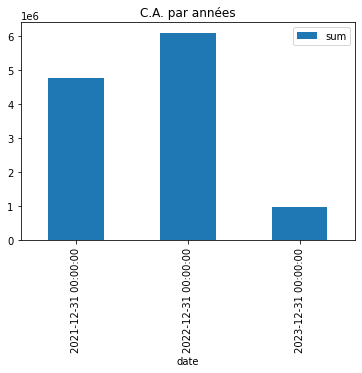

In [5]:
# Calcul du CA total
print("chiffre d'affaire total :", df.price.sum())
# Calcul du CA / années
turnover_annuel = df.price.resample('Y').agg(["sum"])
print(turnover_annuel)
# Graphique du CA / années
turnover_annuel.plot(kind="bar")
plt.title("C.A. par années")
plt.show

<function matplotlib.pyplot.show>

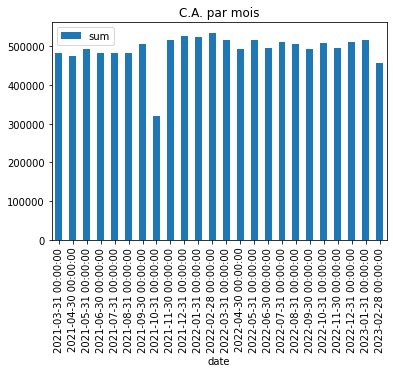

In [6]:
turnover_mensuel = df.price.resample('M').agg(["sum"])
turnover_mensuel.plot(kind="bar")
plt.title("C.A. par mois")
plt.show

### Analyse des clients

In [7]:
print("Nombre de clients : \n", df.client_id.unique().shape)

Nombre de clients : 
 (8600,)


In [8]:
# Calcul du CA générer par client
turnover_client = df.groupby("client_id")[["price"]].sum()
turnover_client

,price
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86
...,...
c_995,189.41
c_996,1625.58
c_997,1490.01


In [9]:
turnover_client.describe()

,price
count,8600.000000
mean,1378.613921
std,5182.880942
min,6.310000
25%,547.885000
50%,1027.210000
75%,1779.785000
max,324033.350000


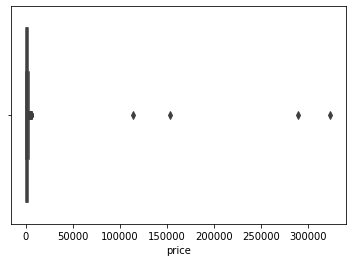

In [10]:
# Un oulier apparait clairement en max, je vais donc en rechercher d'autre
sns.boxplot(x = turnover_client.price)

In [11]:
# 4 clients ont l'air de se démarquer des autres je vérifie dans mon dataframe
turnover_client.sort_values("price", ascending = False)

,price
client_id,
c_1609,324033.350000
c_4958,289760.340000
c_6714,153662.749128
c_3454,113669.844564
c_3263,5276.870000
...,...
c_4648,11.200000
c_240,11.060000
c_8114,9.980000


In [12]:
turnover_client_qui_ont_des_sous = turnover_client.loc[turnover_client["price"]>5300]
turnover_client_qui_ont_des_sous

,price
client_id,
c_1609,324033.350000
c_3454,113669.844564
c_4958,289760.340000
c_6714,153662.749128


> Il s'agit peut être de collège je vais analyser le client 1609 pour voir

In [13]:
c1609 = cl.keep(df, "client_id", "c_1609")
c1609.describe()

,Unnamed: 0,price,categ,birth
count,25488.000000,25488.000000,25488.000000,25488.0
mean,35304.500000,12.713173,0.209196,1980.0
std,7357.896167,7.308135,0.407803,0.0
min,22561.000000,0.620000,0.000000,1980.0
25%,28932.750000,7.320000,0.000000,1980.0
50%,35304.500000,11.990000,0.000000,1980.0
75%,41676.250000,16.870000,0.000000,1980.0
max,48048.000000,145.990000,2.000000,1980.0


> Le client 1609 à fais 25488 achat en 2 ans, je pense qu'il s'agit d'un collège, je vais voir s'il achète les livres pour la rentré des classes

<function matplotlib.pyplot.show>

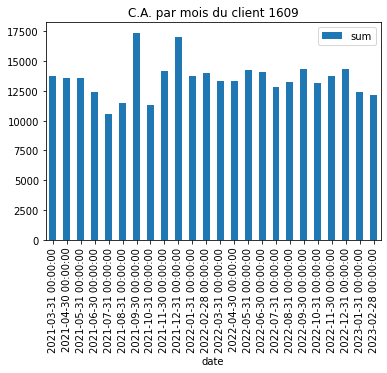

In [14]:
c1609_m = c1609.price.resample('M').agg(["sum"])
c1609_m.plot(kind="bar")
plt.title("C.A. par mois du client 1609")
plt.show

In [15]:
reference_achete = c1609.id_prod.value_counts()
reference = c1609.id_prod.unique()

In [ ]:
plt.figure()
plt.scatter(reference, reference_achete)
plt.show

<function matplotlib.pyplot.show>

> Le client à acheté 1920 références sur 25488 achats